In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Dataset
from google.colab import files
uploaded = files.upload()

Saving palm_ffb.csv to palm_ffb (2).csv


In [3]:
# Read Dataset as Dataframe
df = pd.read_csv("palm_ffb.csv")

**Basic EDA**

Previewing dataframe to ensure the correct dataset was imported.

In [4]:
# Preview Dataframe
df.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


There are total of 9 attributes and 214 observations. All attributes are numerical except for "Date" and there is observation of null values in the dataset.

In [5]:
# Determine Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           130 non-null    object 
 1   SoilMoisture   130 non-null    float64
 2   Average_Temp   130 non-null    float64
 3   Min_Temp       130 non-null    float64
 4   Max_Temp       130 non-null    float64
 5   Precipitation  130 non-null    float64
 6   Working_days   130 non-null    int64  
 7   HA_Harvested   130 non-null    float64
 8   FFB_Yield      130 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.3+ KB


As the objective of the study will be determining the effect of external factors towards the "FFB_Yield", the "Date" was expected to be redundant and hence to be dropped.

In [6]:
# Drop "Date"
df = df.drop(["Date"], axis=1)

To double check the are there any missing values in the dataset after dropping of "Date". From the output, there are no existance of missing values.

In [7]:
# Check Missing Values
df.isnull().sum()

SoilMoisture     0
Average_Temp     0
Min_Temp         0
Max_Temp         0
Precipitation    0
Working_days     0
HA_Harvested     0
FFB_Yield        0
dtype: int64

To determine the central tendancy of all attributes.

In [8]:
# Basic Statistical Data
df.describe().round(4)

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.0000,130.0000,130.0000,130.0000,130.0000,130.0000,130.0000,130.0000
mean,527.6469,26.8499,21.3792,33.8515,188.9808,24.7538,793404.4916,1.6022
std,57.3678,0.6514,0.6890,1.0796,80.2372,1.2393,34440.8939,0.2818
min,380.7000,25.1581,18.9000,31.1000,2.0000,21.0000,683431.9444,1.0800
25%,488.6250,26.4423,21.0000,33.1000,140.3000,24.0000,768966.9491,1.3900
50%,538.3000,26.9306,21.5000,33.9000,182.1500,25.0000,790036.1580,1.5850
75%,571.0250,27.2707,21.8000,34.6000,226.1000,26.0000,821989.2352,1.8075
max,647.3000,28.5800,22.6000,36.0000,496.1000,27.0000,882254.2254,2.2700


To determine the skewness and kurtosis of the dataset.
* "Precipitation" and "FFB_Yield" are negatively skewed.
* All other attributes are positively skewed.
* "SoilMoisture", "Max_Temp" and "FFB_Yield" Platykurtic (negative kurtosis).
* All other attributes are Leptokurtic (positive kurtosis).
* There is no attributes that is Mesokurtic (normal distribution).

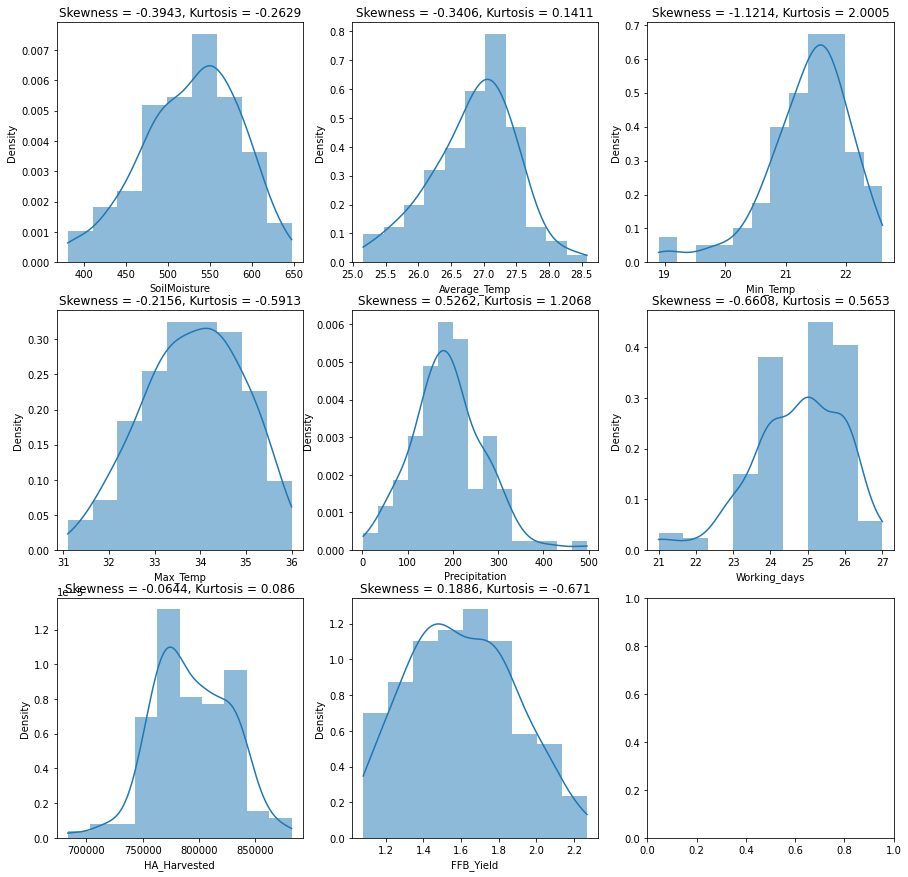

In [9]:
# Determine Skewness & Kurtosis
kurtosis = list(df.kurt().round(4))
skewness = list(df.skew().round(4))
f,axes = plt.subplots(3,3,figsize=(15, 15))

for ax,feature,i,j in zip(axes.flat,df.columns,skewness,kurtosis):
      sns.histplot(df[feature],ax=ax,kde=True,stat="density",linewidth=0).set(title="Skewness = " + str(i) + ", Kurtosis = " + str(j))

**Distribution Study**

Determine the distribution of the dataset. To reduce the process time, only five (5) distributions was chosen to be fitted, if the distribution need to be detremined in a more comprehensive manner, the "distributions" arguments can be removed and the fitter would checked through all the distributions available in the library.

* "Average_Temp", "Min_Temp" and "Precipitation" is best fitted with burr distribution.
* "SoilMoisture", "Max_Temp", "Working_days" and "FFB_Yield" is best fitted with beta distribution.
* "HA_Harvested" is best fitted with gamma distribution.

In [ ]:
# Install PyPI
!pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 4.0 MB/s 
  Created wheel for fitter: filename=fitter-1.4.1-py3-none-any.whl size=25220 sha256=6698f7e3e583d7860556581bf40186ea9bfd73022045da4faa9d1ea7ab24f445
  Stored in directory: /root/.cache/pip/wheels/38/ee/21/98ef5c3186a1f3e8747aa54cf9610fda8876ea82e06c670400
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=0b504d18da0e41d9c0c814be2c85594238002bc2edcacd258f92af733fa17f1b
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built fitter easydev


In [ ]:
# Import Packages from PyPI
from fitter import Fitter, get_common_distributions, get_distributions

In [ ]:
# Determine Data Distribution
for i in df.columns:
  array = df[i].values
  f = Fitter(array,distributions=["gamma","lognorm","beta","burr","norm"])
  f.fit()
  bestdist = f.get_best(method = "sumsquare_error")
  print(str(i))
  print("")
  print(pd.DataFrame.from_dict(bestdist))
  print("")

SoilMoisture

             beta
a        6.089783
b        3.353564
loc    279.169822
scale  385.211990

Average_Temp

             burr
c      103.908608
d        0.494898
loc     -0.523459
scale   27.740795

Min_Temp

            burr
c      91.534844
d       0.338897
loc     2.199872
scale  19.698893

Max_Temp

            beta
a       3.027460
b       2.189335
loc    30.685432
scale   5.457761

Precipitation

             burr
c        7.102157
d        0.433446
loc    -37.600726
scale  270.559692

Working_days

            beta
a      34.001488
b       5.453856
loc     5.141395
scale  22.758312

HA_Harvested

               gamma
a        1495.746690
loc   -535426.982366
scale     888.422716

FFB_Yield

           beta
a      1.616621
b      2.189662
loc    1.061426
scale  1.268603



**Correlation Analysis**

The correlation between ingredients are determined. The correlation matrix was transformed to absolute value (all positive) for better visualisation.
* Highly correlated attributes:
  * SoilMoisture & Average_Temp
  * Average_Temp & Max_Temp
* Negligible correlated attributes:
  * SoilMoisture & Min_Temp
  * Average_Temp & Min_Temp
  * Min_Temp & Max_Temp
  * Working_days & All attributes
  * Min_Temp & HA_Harvested
  * SoilMoisture & FFB_Yield
  * Temperature Attributes & FFB_Yield

As a result from correlation analysis, "Working_days" is found poorly correlated with all the attributes of the dataset, hence was then concluded to be a redundant attribute.

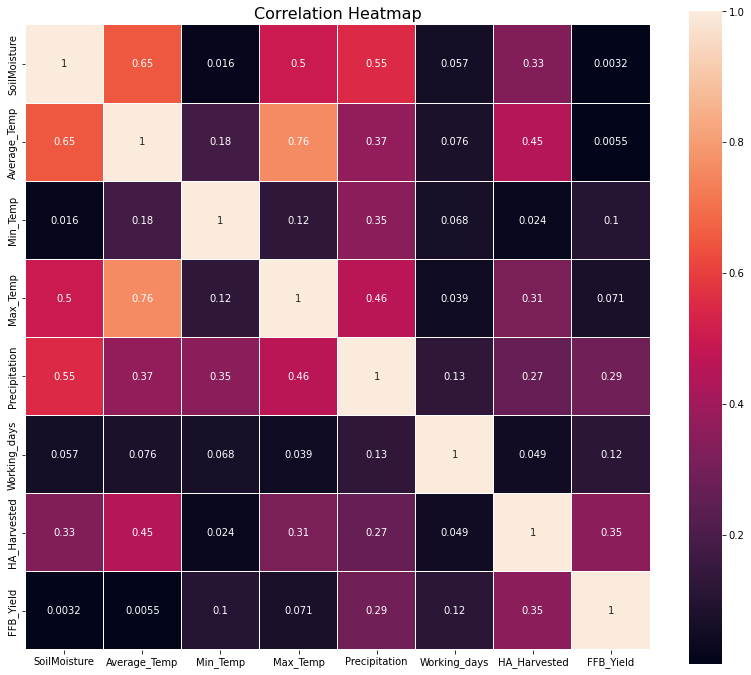

In [ ]:
# Correlation Heatmap
correlation = abs(df.corr())
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation Heatmap', y = 1, size = 16)
sns.heatmap(correlation, vmax = 1.0, linewidths = 0.01, square = True, annot = True, linecolor = "white")

In [9]:
# Drop "Working_days"
df = df.drop(["Working_days"], axis=1)

**Relationship Analysis**

In [13]:
# Seperating Dataframe
df_dep = df["FFB_Yield"]
df_ind = df.drop(["FFB_Yield"], axis=1)

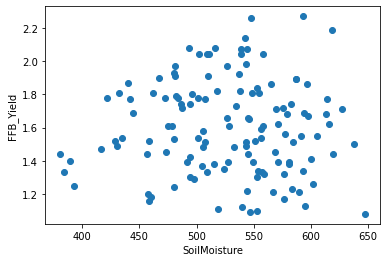

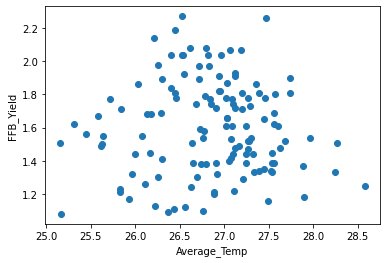

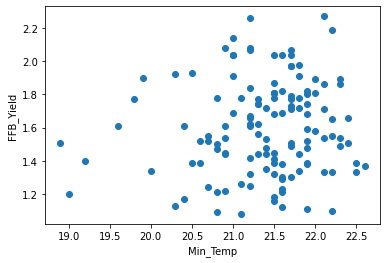

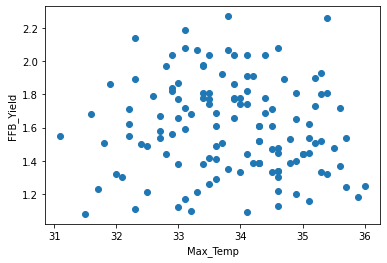

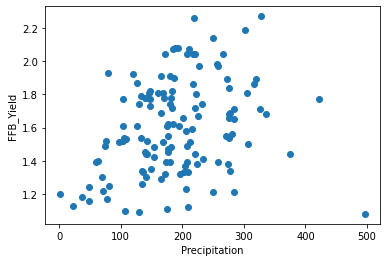

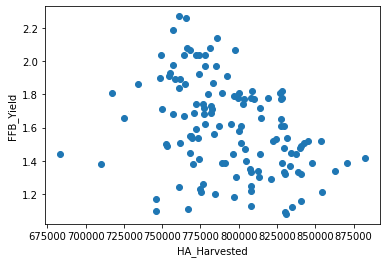

In [23]:
# Visualising Relationship
for i in df_ind.columns:
  plt.scatter(df_ind[i],df_dep)
  plt.xlabel(i)
  plt.ylabel("FFB_Yield")
  plt.show()